<a href="https://colab.research.google.com/github/ShaheedSanjar/NLP/blob/main/2403A54107_NLP_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 58.8 MB/s eta 0:00:00


In [3]:
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
model_word2vec = api.load("word2vec-google-news-300")
model_glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded


In [6]:
word_list = [
    "emperor", "empress", "duke", "duchess", "sovereign",
    "academy", "institute", "classroom", "professor", "learner",
    "physician", "therapist", "clinic", "treatment", "pharmacist",
    "horse", "wolf", "leopard", "bear", "giraffe",
    "motorcycle", "scooter", "tram", "van", "subway",
    "laptop", "network", "application", "processor", "monitor",
    "japan", "germany", "tokyo", "berlin", "rome",
    "valley", "desert", "island", "waterfall", "moon"
]


In [7]:
vectors = [model_word2vec[word] for word in word_list if word in model_word2vec]

vectors_word2vec = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_word2vec.shape)
print(vectors_word2vec[0])

Total selected words: 40
Vector shape: (40, 300)
[ 4.21875000e-01  2.07031250e-01  1.16699219e-01  1.32812500e-01
 -1.27929688e-01  5.40161133e-03  5.15747070e-03 -1.01074219e-01
  2.63671875e-01  2.33398438e-01 -1.25976562e-01 -3.65234375e-01
  1.68945312e-01 -5.12695312e-02 -3.14453125e-01  1.92382812e-01
 -8.54492188e-03  8.78906250e-02 -3.80859375e-02 -1.60156250e-01
  2.77343750e-01 -1.02539062e-01  1.71875000e-01 -1.46484375e-01
  1.71875000e-01  1.79443359e-02  1.37695312e-01 -1.18652344e-01
  1.14135742e-02 -2.51953125e-01  1.91406250e-01  1.83105469e-02
 -2.08007812e-01  3.24218750e-01 -1.20239258e-02 -2.04101562e-01
  4.35546875e-01 -2.63671875e-02 -6.98242188e-02  6.22558594e-02
  6.29882812e-02  4.22363281e-02  2.18750000e-01  9.08203125e-02
  3.49609375e-01 -1.99218750e-01 -1.85546875e-02  2.67578125e-01
 -3.96484375e-01 -4.63867188e-02  6.93359375e-02 -2.15148926e-03
 -2.48046875e-01  8.30078125e-03 -3.28125000e-01  1.73828125e-01
 -2.91015625e-01 -2.40234375e-01  3.61328

In [8]:
vectors = [model_glove[word] for word in word_list if word in model_glove]

vectors_glove = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_glove.shape)
print(vectors_glove[0])

Total selected words: 40
Vector shape: (40, 100)
[ 0.7575   -0.13287   0.5217    1.2991   -0.16518   1.1799   -0.45735
 -0.79198  -0.35277  -0.81676   0.26819   1.061     0.63207  -0.10915
  0.4121   -1.4576    0.4565   -0.81838  -1.1573   -0.25996  -0.02946
 -0.68898  -0.77833   1.278    -0.25662   0.56954  -0.13088   0.21946
  1.0784    0.038234  0.46404   0.33497   0.44194  -0.4332   -0.4112
  0.67839  -0.03678  -0.16266  -0.6268   -0.66695  -0.22764   0.50231
  0.89474  -1.1341    0.66046  -0.93686  -0.2937   -0.23344   0.74724
 -0.17418   0.10537   0.40316   1.1315    0.59375  -0.24064  -1.5688
 -0.39137   0.14926   0.054912 -0.17976  -0.15347   0.54264   0.55507
  1.2522    0.3822   -0.5333   -0.70869   0.41096  -0.27323   0.19013
  0.14471  -1.0896    0.054523  0.090513 -0.60101   0.15456  -1.3422
  0.83952  -0.45076   0.26313   0.68505  -0.070829 -0.20023   0.47119
 -0.99008   1.0104   -0.73999  -1.1673    0.79968  -0.86605   0.97512
 -0.75129   1.0043    0.33486  -0.049213 -1.

In [9]:
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_word2vec)

print("Original Shape:", vectors_word2vec.shape)
print("Reduced Shape:", tsne_coordinates.shape)

print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_word2vec[:5])

Original Shape: (40, 300)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ -16.253222 -182.3641  ]
 [ -24.138556 -207.98746 ]
 [ -50.26489  -143.74123 ]
 [ -59.42007  -218.9038  ]
 [ -24.268515  203.8524  ]]

First 5 t-SNE Coordinates:
[[ 4.21875000e-01  2.07031250e-01  1.16699219e-01 ...  7.17773438e-02
   2.06054688e-01  1.31835938e-01]
 [ 1.26953125e-01  1.21582031e-01 -1.97265625e-01 ...  3.82812500e-01
   2.77343750e-01  2.27539062e-01]
 [-2.77099609e-02 -3.81469727e-05 -1.40625000e-01 ...  1.75781250e-02
   1.55273438e-01  1.23046875e-01]
 [-1.39770508e-02 -1.90429688e-01 -3.86718750e-01 ... -6.83593750e-02
   4.51171875e-01  2.39257812e-02]
 [ 5.76171875e-02 -2.14843750e-01  9.47265625e-02 ...  1.75781250e-01
  -9.91210938e-02 -5.54199219e-02]]


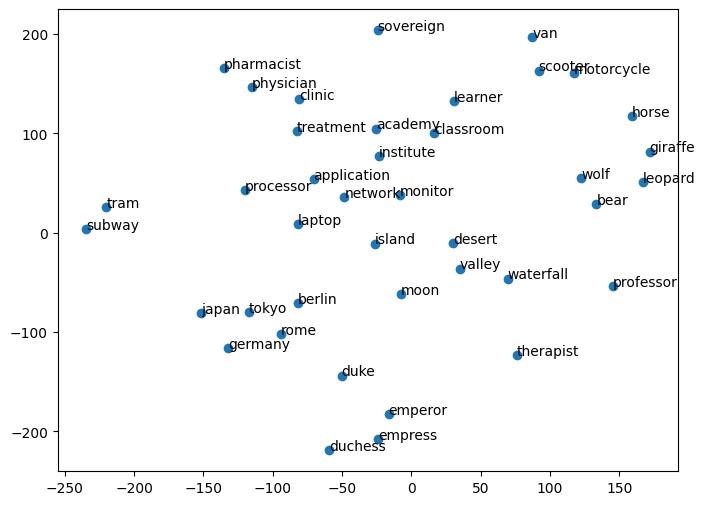

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()

In [11]:

tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_glove)

print("Original Shape:", vectors_glove.shape)
print("Reduced Shape:", tsne_coordinates.shape)

print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_glove[:5])

Original Shape: (40, 100)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ 215.75166  286.21332]
 [ 209.01587  241.45436]
 [ 166.26234  140.86029]
 [ 183.81465  181.2193 ]
 [ 200.18304 -188.63618]]

First 5 t-SNE Coordinates:
[[ 7.5750e-01 -1.3287e-01  5.2170e-01  1.2991e+00 -1.6518e-01  1.1799e+00
  -4.5735e-01 -7.9198e-01 -3.5277e-01 -8.1676e-01  2.6819e-01  1.0610e+00
   6.3207e-01 -1.0915e-01  4.1210e-01 -1.4576e+00  4.5650e-01 -8.1838e-01
  -1.1573e+00 -2.5996e-01 -2.9460e-02 -6.8898e-01 -7.7833e-01  1.2780e+00
  -2.5662e-01  5.6954e-01 -1.3088e-01  2.1946e-01  1.0784e+00  3.8234e-02
   4.6404e-01  3.3497e-01  4.4194e-01 -4.3320e-01 -4.1120e-01  6.7839e-01
  -3.6780e-02 -1.6266e-01 -6.2680e-01 -6.6695e-01 -2.2764e-01  5.0231e-01
   8.9474e-01 -1.1341e+00  6.6046e-01 -9.3686e-01 -2.9370e-01 -2.3344e-01
   7.4724e-01 -1.7418e-01  1.0537e-01  4.0316e-01  1.1315e+00  5.9375e-01
  -2.4064e-01 -1.5688e+00 -3.9137e-01  1.4926e-01  5.4912e-02 -1.7976e-01
  -1.5347e-01  5.4264e-01  5.

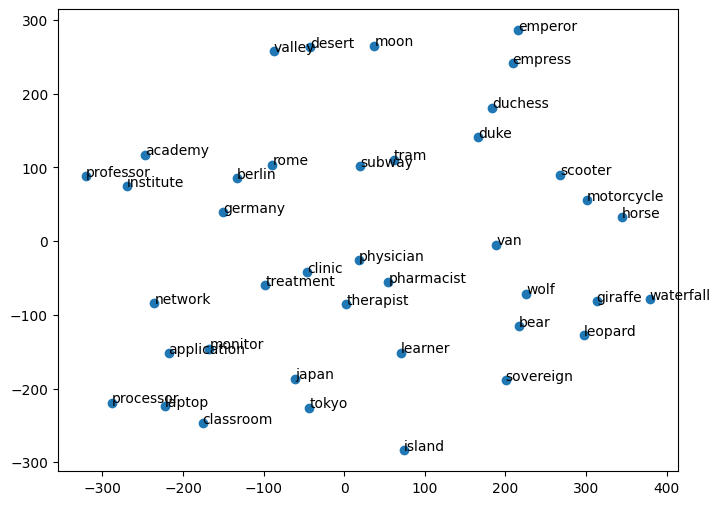

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()